In [1]:
!pip install folium==0.5.0
!pip install geopy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from sklearn.cluster import KMeans
sns.set()

In [2]:
address = 'Brasília, DF'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brasília are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brasília are -15.7754462, -47.7970891.


In [3]:
states = ['Rio Branco, AC',
'Maceió, AL',
'Macapá, AP',
'Manaus, AM',
'Salvador, BA',
'Fortaleza, CE',
'Brasília, DF',
'Vitória, ES',
'Goiânia, GO',
'São Luís, MA',
'Cuiabá, MT',
'Campo Grande, MS',
'Belo Horizonte, MG',
'Belém, PA',
'João Pessoa, PB',
'Curitiba, PR',
'Recife, PE',
'Teresina, PI',
'Rio de Janeiro, RJ',
'Natal, RN',
'Porto Alegre, RS',
'Porto Velho, RO',
'Boa Vista, RR',
'Florianópolis, SC',
'São Paulo, SP',
'Aracaju, SE',
'Palmas, TO']

In [4]:
locations = []
for i in states:
    if i == 'Manaus, AM':
        latitude=-3.07153
        longitude=-60.02332
        locations.append((i,latitude,longitude))
    else:
        address = i
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        locations.append((i,latitude,longitude))
print(locations)

[('Rio Branco, AC', -9.9765362, -67.8220778), ('Maceió, AL', -9.5626953, -35.787215613341225), ('Macapá, AP', 0.0401529, -51.0569588), ('Manaus, AM', -3.07153, -60.02332), ('Salvador, BA', -12.9822499, -38.4812772), ('Fortaleza, CE', -3.7304512, -38.5217989), ('Brasília, DF', -15.7754462, -47.7970891), ('Vitória, ES', -20.3200917, -40.3376682), ('Goiânia, GO', -16.680882, -49.2532691), ('São Luís, MA', -2.5634605, -44.2448718), ('Cuiabá, MT', -15.865135526513601, -56.86713686032174), ('Campo Grande, MS', -20.4640173, -54.6162947), ('Belo Horizonte, MG', -19.9227318, -43.9450948), ('Belém, PA', -1.45056, -48.4682453), ('João Pessoa, PB', -7.1215981, -34.882028), ('Curitiba, PR', -25.4295963, -49.2712724), ('Recife, PE', -8.0584933, -34.8848193), ('Teresina, PI', -5.0896403, -42.809588), ('Rio de Janeiro, RJ', -22.9110137, -43.2093727), ('Natal, RN', -5.805398, -35.2080905), ('Porto Alegre, RS', -30.0324999, -51.2303767), ('Porto Velho, RO', -8.7494525, -63.8735438), ('Boa Vista, RR', 2.

In [5]:
df = pd.DataFrame(locations,columns=['city','latitude','longitude'])

In [6]:
df.head()

,city,latitude,longitude
0,"Rio Branco, AC",-9.976536,-67.822078
1,"Maceió, AL",-9.562695,-35.787216
2,"Macapá, AP",0.040153,-51.056959
3,"Manaus, AM",-3.071530,-60.023320
4,"Salvador, BA",-12.982250,-38.481277


In [7]:
map_brasil = folium.Map(location=[-15.7754462, -47.7970891], zoom_start=5)

for lat, lng, label in zip(df['latitude'], df['longitude'], df['city']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brasil)  
    
map_brasil

In [9]:
def getNearbyVenues(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']

        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['city', 
                  'city Latitude', 
                  'city Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Test
def getNearbyVenues(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']

        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['city', 
                  'city Latitude', 
                  'city Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [10]:
capital_venues = getNearbyVenues(names=df['city'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

Rio Branco, AC
Maceió, AL
Macapá, AP
Manaus, AM
Salvador, BA
Fortaleza, CE
Brasília, DF
Vitória, ES
Goiânia, GO
São Luís, MA
Cuiabá, MT
Campo Grande, MS
Belo Horizonte, MG
Belém, PA
João Pessoa, PB
Curitiba, PR
Recife, PE
Teresina, PI
Rio de Janeiro, RJ
Natal, RN
Porto Alegre, RS
Porto Velho, RO
Boa Vista, RR
Florianópolis, SC
São Paulo, SP
Aracaju, SE
Palmas, TO


In [11]:
capital_venues.head()

,city,city Latitude,city Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rio Branco, AC",-9.976536,-67.822078,Jarude,-9.969348,-67.803181,Middle Eastern Restaurant
1,"Rio Branco, AC",-9.976536,-67.822078,Pão de Queijo Restaurante,-9.968138,-67.826072,Brazilian Restaurant
2,"Rio Branco, AC",-9.976536,-67.822078,Chalé do Trigo,-9.964589,-67.806646,Bakery
3,"Rio Branco, AC",-9.976536,-67.822078,Deck Churrasquin,-9.968967,-67.809003,Churrascaria
4,"Rio Branco, AC",-9.976536,-67.822078,Britos Lanche,-9.959869,-67.852435,Snack Place


In [12]:
capital_onehot = pd.get_dummies(capital_venues[['Venue Category']], prefix="", prefix_sep="")

capital_onehot['city'] = capital_venues['city'] 

fixed_columns = [capital_onehot.columns[-1]] + list(capital_onehot.columns[:-1])
capital_onehot = capital_onehot[fixed_columns]

capital_onehot.head()

,city,Acai House,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Baiano Restaurant,...,Southern Brazilian Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Tapiocaria,Thai Restaurant,Vegetarian / Vegan Restaurant,Wings Joint
0,"Rio Branco, AC",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Rio Branco, AC",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Rio Branco, AC",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Rio Branco, AC",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Rio Branco, AC",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
capital_grouped = capital_onehot.groupby('city').mean().reset_index()
capital_grouped.head(20)

,city,Acai House,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Baiano Restaurant,...,Southern Brazilian Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Tapiocaria,Thai Restaurant,Vegetarian / Vegan Restaurant,Wings Joint
0,"Aracaju, SE",0.000000,0.01,0.00,0.000000,0.01,0.010000,0.040000,0.000000,0.00,...,0.00,0.00,0.010000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.0
1,"Belo Horizonte, MG",0.010000,0.00,0.00,0.000000,0.01,0.000000,0.070000,0.000000,0.00,...,0.00,0.00,0.030000,0.000000,0.01,0.00,0.000000,0.00,0.020000,0.0
2,"Belém, PA",0.020000,0.00,0.01,0.000000,0.00,0.000000,0.060000,0.020000,0.00,...,0.00,0.00,0.000000,0.020000,0.00,0.00,0.000000,0.00,0.010000,0.0
3,"Boa Vista, RR",0.000000,0.00,0.00,0.000000,0.00,0.020408,0.102041,0.020408,0.00,...,0.00,0.00,0.000000,0.020408,0.00,0.00,0.020408,0.00,0.000000,0.0
4,"Brasília, DF",0.020000,0.00,0.00,0.000000,0.02,0.000000,0.000000,0.000000,0.00,...,0.01,0.00,0.070000,0.040000,0.00,0.00,0.000000,0.00,0.030000,0.0
5,"Campo Grande, MS",0.000000,0.00,0.00,0.000000,0.00,0.000000,0.040541,0.000000,0.00,...,0.00,0.00,0.027027,0.027027,0.00,0.00,0.000000,0.00,0.027027,0.0
6,"Cuiabá, MT",0.000000,0.00,0.00,0.000000,0.00,0.000000,0.250000,0.000000,0.00,...,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.0
7,"Curitiba, PR",0.000000,0.00,0.02,0.000000,0.01,0.020000,0.030000,0.000000,0.00,...,0.00,0.01,0.050000,0.010000,0.00,0.00,0.000000,0.01,0.030000,0.0
8,"Florianópolis, SC",0.000000,0.00,0.00,0.000000,0.00,0.000000,0.030000,0.000000,0.00,...,0.00,0.00,0.010000,0.040000,0.00,0.00,0.000000,0.00,0.010000,0.0
9,"Fortaleza, CE",0.030000,0.00,0.00,0.000000,0.01,0.010000,0.010000,0.000000,0.00,...,0.00,0.00,0.040000,0.010000,0.00,0.00,0.000000,0.00,0.000000,0.0


In [14]:
num_top_venues = 5

for hood in capital_grouped['city']:
    print("----"+hood+"----")
    temp = capital_grouped[capital_grouped['city'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aracaju, SE----
                               venue  freq
0               Brazilian Restaurant  0.16
1                         Restaurant  0.08
2                             Bakery  0.07
3                 Seafood Restaurant  0.06
4  Northeastern Brazilian Restaurant  0.06


----Belo Horizonte, MG----
                  venue  freq
0                Bakery  0.14
1  Brazilian Restaurant  0.14
2           Pizza Place  0.08
3             BBQ Joint  0.07
4           Snack Place  0.06


----Belém, PA----
                  venue  freq
0                Bakery  0.10
1  Brazilian Restaurant  0.10
2            Restaurant  0.09
3             BBQ Joint  0.06
4          Burger Joint  0.06


----Boa Vista, RR----
                  venue  freq
0           Pizza Place  0.14
1            Restaurant  0.12
2          Burger Joint  0.10
3             BBQ Joint  0.10
4  Brazilian Restaurant  0.06


----Brasília, DF----
                  venue  freq
0                Bakery  0.09
1           Pizza Place  0

In [15]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [16]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['city']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['city'] = capital_grouped['city']

for ind in np.arange(capital_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(capital_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted.head()

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Aracaju, SE",Brazilian Restaurant,Restaurant,Bakery,Seafood Restaurant,Northeastern Brazilian Restaurant,Café,Burger Joint,Fast Food Restaurant,Pizza Place,BBQ Joint
1,"Belo Horizonte, MG",Bakery,Brazilian Restaurant,Pizza Place,BBQ Joint,Snack Place,Burger Joint,Restaurant,Italian Restaurant,Japanese Restaurant,Steakhouse
2,"Belém, PA",Bakery,Brazilian Restaurant,Restaurant,BBQ Joint,Burger Joint,Japanese Restaurant,Food Truck,Snack Place,Sandwich Place,Italian Restaurant
3,"Boa Vista, RR",Pizza Place,Restaurant,BBQ Joint,Burger Joint,Brazilian Restaurant,Bakery,Snack Place,Breakfast Spot,Hot Dog Joint,Café
4,"Brasília, DF",Bakery,Brazilian Restaurant,Pizza Place,Steakhouse,Food Truck,Burger Joint,Café,Seafood Restaurant,Restaurant,Sushi Restaurant


In [70]:
city_venues_sorted.set_index('city',inplace=True)

In [71]:
city_venues_sorted.head(27)

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
city,,,,,,,,,,
"Aracaju, SE",Brazilian Restaurant,Restaurant,Bakery,Seafood Restaurant,Northeastern Brazilian Restaurant,Café,Burger Joint,Fast Food Restaurant,Pizza Place,BBQ Joint
"Belo Horizonte, MG",Bakery,Brazilian Restaurant,Pizza Place,BBQ Joint,Snack Place,Burger Joint,Restaurant,Italian Restaurant,Japanese Restaurant,Steakhouse
"Belém, PA",Bakery,Brazilian Restaurant,Restaurant,BBQ Joint,Burger Joint,Japanese Restaurant,Food Truck,Snack Place,Sandwich Place,Italian Restaurant
"Boa Vista, RR",Pizza Place,Restaurant,BBQ Joint,Burger Joint,Brazilian Restaurant,Bakery,Snack Place,Breakfast Spot,Hot Dog Joint,Café
"Brasília, DF",Bakery,Brazilian Restaurant,Pizza Place,Steakhouse,Food Truck,Burger Joint,Café,Seafood Restaurant,Restaurant,Sushi Restaurant
"Campo Grande, MS",Bakery,Pizza Place,Brazilian Restaurant,Churrascaria,Burger Joint,Italian Restaurant,Restaurant,BBQ Joint,Buffet,Fast Food Restaurant
"Cuiabá, MT",Snack Place,Restaurant,BBQ Joint,Wings Joint,Fast Food Restaurant,Comfort Food Restaurant,Creperie,Deli / Bodega,Diner,Donut Shop
"Curitiba, PR",Italian Restaurant,Pizza Place,Brazilian Restaurant,Bakery,Café,Steakhouse,Churrascaria,Buffet,Middle Eastern Restaurant,Seafood Restaurant
"Florianópolis, SC",Seafood Restaurant,Bakery,Pizza Place,Brazilian Restaurant,Burger Joint,Restaurant,Sushi Restaurant,Italian Restaurant,Café,Churrascaria


In [19]:
import ipywidgets as widgets

In [76]:
[city_venues_sorted[i].unique().tolist() for i in city_venues_sorted.columns]

[['Brazilian Restaurant',
  'Bakery',
  'Pizza Place',
  'Snack Place',
  'Italian Restaurant',
  'Seafood Restaurant',
  'Restaurant',
  'Café'],
 ['Restaurant',
  'Brazilian Restaurant',
  'Pizza Place',
  'Bakery',
  'Burger Joint',
  'BBQ Joint',
  'Steakhouse'],
 ['Bakery',
  'Pizza Place',
  'Restaurant',
  'BBQ Joint',
  'Brazilian Restaurant',
  'Italian Restaurant',
  'Seafood Restaurant',
  'Japanese Restaurant',
  'Café',
  'Baiano Restaurant'],
 ['Seafood Restaurant',
  'BBQ Joint',
  'Burger Joint',
  'Steakhouse',
  'Churrascaria',
  'Wings Joint',
  'Bakery',
  'Brazilian Restaurant',
  'Snack Place',
  'Pizza Place',
  'Restaurant',
  'Japanese Restaurant',
  'Sandwich Place',
  'Sushi Restaurant',
  'Middle Eastern Restaurant'],
 ['Northeastern Brazilian Restaurant',
  'Snack Place',
  'Burger Joint',
  'Brazilian Restaurant',
  'Food Truck',
  'Fast Food Restaurant',
  'Café',
  'Restaurant',
  'Pizza Place',
  'Acai House',
  'Diner',
  'Steakhouse',
  'Bakery',
  'S

In [77]:
rest = [city_venues_sorted[i].unique().tolist() for i in city_venues_sorted.columns]

In [78]:
restaurants = list(set([j for i in rest for j in i]))

In [79]:
restaurants

['Donut Shop',
 'French Restaurant',
 'Peruvian Restaurant',
 'Café',
 'Seafood Restaurant',
 'Brazilian Restaurant',
 'Northeastern Brazilian Restaurant',
 'Deli / Bodega',
 'Salad Place',
 'Fast Food Restaurant',
 'Middle Eastern Restaurant',
 'Fish & Chips Shop',
 'Hot Dog Joint',
 'Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Wings Joint',
 'Baiano Restaurant',
 'Comfort Food Restaurant',
 'Bakery',
 'Sushi Restaurant',
 'Acai House',
 'BBQ Joint',
 'Food Truck',
 'Steakhouse',
 'Italian Restaurant',
 'Chinese Restaurant',
 'Creperie',
 'Snack Place',
 'Breakfast Spot',
 'Buffet',
 'Food Court',
 'Sandwich Place',
 'Japanese Restaurant',
 'Pizza Place',
 'Diner',
 'Burger Joint',
 'Churrascaria']

In [80]:
restaurants.append('NONE OF THE ABOVE')

In [81]:
c = widgets.Dropdown(
    options=states,
    description='Capital of choice:',
    disabled=False,
)

In [82]:
r = widgets.Dropdown(
    options=restaurants,
    description='Type of restaurant:',
    disabled=False,
)

## Slider to make the choice, in wich capital and waht type o restaurant

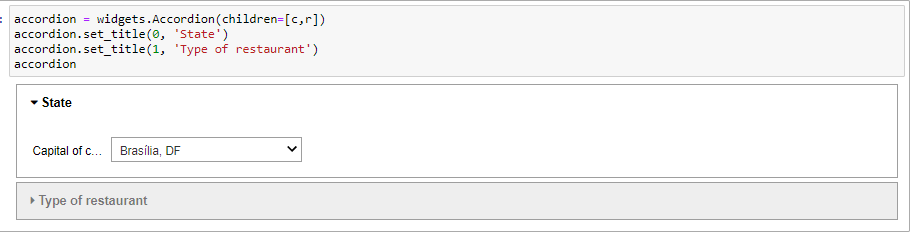

In [179]:
from IPython.display import Image
Image(filename='Screenshot_9.png') 

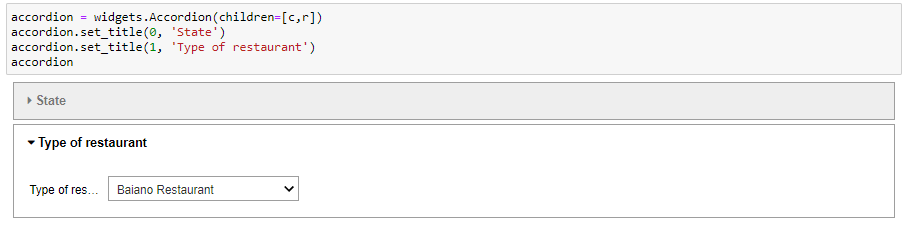

In [180]:
Image(filename='Screenshot_8.png')

In [169]:
accordion = widgets.Accordion(children=[c,r])
accordion.set_title(0, 'State')
accordion.set_title(1, 'Type of restaurant')
accordion

Accordion(children=(Dropdown(description='Capital of choice:', index=6, options=('Rio Branco, AC', 'Maceió, AL…

## Advice based around your choice

In [177]:
try:
    city_venues_sorted.loc[c.value].reset_index().set_index(c.value).loc[r.value]
except:
    print("it's not at the top 10.")
    print('\n')
    print("there's little to no supply, and little to no demand.")
    print('\n')
    print("So it's up to you to decide, maybe you shouldn't go there.")
else:
    result = city_venues_sorted.loc[c.value].reset_index().set_index(c.value).loc[r.value][0]
    if result in ['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue']:
        print("One of the 3 most numerous restaurant type's on this capital.")
        print('\n')
        print(f'{result} on {c.value}.')
        print('\n')
        print('The higher number of venues of this type is a good estimate of the demand.')
        print('\n')
        print('Hight supply and demand.')
        print('\n')
        print("So it's to decide if you want to build there or not.")
    else:
        print(result)
        print('\n')
        print('Go for it, the demand is high and the supply not so much.')
        print('\n')
        print('Nice place to expand to.')

it's not at the top 10.


there's little to no supply, and little to no demand.


So it's up to you to decide, maybe you shouldn't go there.
